<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python @ Máster IoT</center>

# DSPy6 Challenge. Pandas.

**Inicialización**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = (16, 9)

Vamos a trabajar con un dataset que contiene una lista de películas con, entre otros atributos, el número de muertes visibles en ellas. Se encuentra en el fichero `filmdeathcounts.csv`.

<img src="villains.jpg" style="width:400px">

In [2]:
df = pd.read_csv("filmdeathcounts.csv")
df.info()
df.head()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
Film              545 non-null object
Year              545 non-null int64
Body_Count        545 non-null int64
MPAA_Rating       545 non-null object
Genre             545 non-null object
Director          545 non-null object
Length_Minutes    545 non-null int64
IMDB_Rating       545 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.1+ KB


Film  Year  Body_Count MPAA_Rating  \
0              24 Hour Party People  2002           7           R   
1                     28 Days Later  2002          53           R   
2                    28 Weeks Later  2007         212           R   
3                  30 Days of Night  2007          67           R   
4                               300  2007         600           R   
5                      3:10 To Yuma  2007          45           R   
6                               8MM  1999           1           R   
7                 A Better Tomorrow  1986          65           R   
8              A Better Tomorrow II  1987         199           R   
9                  A Bridge Too Far  1977         243          PG   
10                A Christmas Story  1983           4          PG   
11               A Clockwork Orange  1971           7           X   
12             A Fistful of Dollars  1964         109           M   
13            A Fistful of Dynamite  1971         471          PG   
14            A History of Violence  2005          13           R   
15                      A Man Apart  2003          39           R   
16        A Nightmare on Elm Street  1984           4           R   
17                    Above the Law  1988          18           R   
18                   Action Jackson  1988          17           R   
19                        Aeon Flux  2005          58       PG-13   
20                    Air Force One  1997          54           R   
21                            Akira  1988         119           R   
22                        Alexander  2005         119           R   
23                  Ali G Indahouse  2002          11           R   
24                            Alien  1979           1           R   
25                           Aliens  1986          68           R   
26     Aliens vs. Predator: Requiem  2007           5           R   
27                        Alpha Dog  2007           3           R   
28                   Altered States  1980           5           R   
29                American Gangster  2007          15           R   
..                              ...   ...         ...         ...   
515                     Under Siege  1992          65           R   
516                   Under Siege 2  1995          47           R   
517                      Underworld  2003          58           R   
518           Underworld: Evolution  2006          75           R   
519               Universal Soldier  1992          47           R   
520                     Van Helsing  2004          65       PG-13   
521                      Waist Deep  2006           6           R   
522  Walk Hard: The Dewey Cox Story  2007           5           R   
523                    Walking Tall  2004           6       PG-13   
524                          Wanted  2008          57           R   
525                             War  2007          97           R   
526               War of the Worlds  2005          52       PG-13   
527                       War, Inc.  2008          73           R   
528      Warriors of the Wasteland   1983          89           R   
529                          Wasabi  2001          22           R   
530                        Watchmen  2009          77           R   
531                        Waterloo  1970         210           G   
532                      Waterworld  1995          67       PG-13   
533                We Were Soldiers  2002         305           R   
534               Where Eagles Dare  1968         100           M   
535                  Wild Wild West  1999          95       PG-13   
536                     Windtalkers  2002         389           R   
537                         Yojimbo  1961          61     Unrated   
538                     You Kill Me  2007          10           R   
539             You Only Live Twice  1967          91    Approved   
540                        Zatoichi  2003          81           R   
541                          

Necesitaréis hacer plots muy básicos...

**Ejercicio 1:** Muestra un dataframe con los 10 films con menos muertes, y su número de muertes, ordenados de menos a más.

In [3]:
df_deaths = df[['Film','Body_Count']]
df_deaths.sort_values(by='Body_Count').head(10)

Film  Body_Count
24                      Alien           1
6                         8MM           1
495                 The Yards           2
502                To Die For           2
541                    Zodiac           3
255              Mean Machine           3
128              Donnie Darko           3
213         Kill Bill: Vol. 2           3
471  The Phantom of the Opera           3
47                Barton Fink           3

**Ejercicio 2:** ¿Cuál es el film con más muertes? (Muestra el film y el número de muertes). Mostrar como un dataframe con una sola fila, no como una serie.

In [4]:
df_deaths_h = df_deaths.set_index('Film')
df_deaths_h.sort_values(by='Body_Count', ascending=False).head(1)

Body_Count
Film                                             
Lord of the Rings: Return of the King         836

**Ejercicio 3:** Esta pregunta equivaldría a "¿cuál es el film más violento?". Si no, ¿cuál es?

La película más violenta es 300, ya que tiene el mayor número de muertes por minuto.

In [5]:
df['Deaths_Min'] = round(df['Body_Count']/df['Length_Minutes']).astype(int)
df_deaths_min = df[['Film','Body_Count','Length_Minutes','Deaths_Min', 'Year']]
df_deaths_min.sort_values(by='Deaths_Min', ascending=False).head(1)

Film  Body_Count  Length_Minutes  Deaths_Min  Year
4  300         600             117           5  2007

**Ejercicio 4:** ¿Nos estamos volviendo más violentos con el tiempo en lo que a cine se refiere? ¿Cuánta evidencia tienes de tu respuesta? _Hint: Para poder responder bien a este ejercicio, serían interesantes dos gráficos: violencia por año y películas por año..._

Como podemos observar en la gráfica, en la década de los 2000s (2000-2010) es cuando más violentos "hemos sido"; pero en los últimos años esto ha cambiado y el número de muertes por minuto que hay actualmente se ha reducido considerablemente.

##### Violencia por año

In [6]:
df_deaths_year = df_deaths_min.groupby('Year').agg({'Deaths_Min':'sum'})

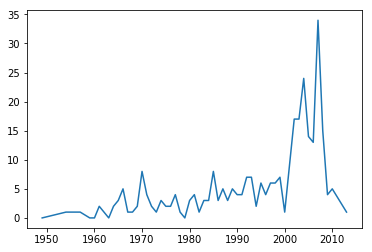

In [7]:
plt.plot(df_deaths_year)

##### Películas por año

In [8]:
df_films_year = df.groupby('Year').agg({'Film':'count'})

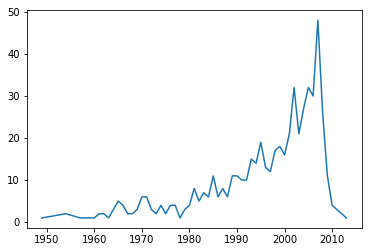

In [9]:
plt.plot(df_films_year)

**Ejercicio 5**: La columna de género está en un formato difícil de tratar: múltiples géneros para una película están concatenados con "|". Convierte esa columna a listas de género. Eg., "Horror|Sci-Fi" -> "["Horror", "Sci-Fi"]".

In [10]:
import unicodedata
def change_genre(row):
    try:
        row['Genre'] = row.Genre.replace("|", " ")
        row['Genre'] = row.Genre.split()
    except:
        pass
    return row

df_Genre = df.apply(change_genre, axis=1)

In [11]:
df_Genre.head()

Film  Year  Body_Count MPAA_Rating  \
0  24 Hour Party People  2002           7           R   
1         28 Days Later  2002          53           R   
2        28 Weeks Later  2007         212           R   
3      30 Days of Night  2007          67           R   
4                   300  2007         600           R   

                               Genre                 Director  Length_Minutes  \
0  [Biography, Comedy, Drama, Music]     Michael Winterbottom             117   
1         [Horror, Sci-Fi, Thriller]              Danny Boyle             113   
2         [Horror, Sci-Fi, Thriller]  Juan Carlos Fresnadillo             100   
3                 [Horror, Thriller]              David Slade             113   
4    [Action, Fantasy, History, War]              Zack Snyder             117   

   IMDB_Rating  Deaths_Min  
0          7.3           0  
1          7.6           0  
2          7.0           2  
3          6.6           1  
4          7.7           5

Para los siguientes ejercicios contamos con otro CSV, `tmdb_5000_movies.csv`, con más películas y más información sobre las mismas.

In [12]:
df2 = pd.read_csv("tmdb_5000_movies.csv")
df2.info()
df2.head()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5     258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
6     260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
7     280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
8     250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
9     250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
10    270000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
11    200000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
12    200000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
13    255000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
14    225000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
15    225000000  [{"id": 12, "name": "Adventure"}, {"id": 10751...   
16    220000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
17    380000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
18    225000000  [{"id": 28, "name": "Action"}, {"id": 35, "nam...   
19    250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
20    215000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
21    200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
22    250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
23    180000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
24    207000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
25    200000000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
26    250000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
27    209000000  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   
28    150000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
29    200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4773      27000                     [{"id": 35, "name": "Comedy"}]   
4774      27000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
4775          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4776          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4777          0                      [{"id": 18, "name": "Drama"}]   
4778          0  [{"id": 28, "name": "Action"}, {"id": 18, "nam...   
4779          0                     [{"id": 35, "name": "Comedy"}]   
4780          0  [{"id": 53, "name": "Thriller"}, {"id": 80, "n...   
4781      22000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4782          0  [{"id": 18, "name": "Drama"}, {"id": 10751, "n...   
4783          0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4784          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4785          0                      [{"id": 18, "name": "Drama"}]   
4786          0  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4787          0  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4788      12000  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...   
4789          0                      [{"id": 18, "name": "Drama"}]   
4790          0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   
4791         13                     [{"id": 27, "name": "Horror"}]   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   
4793          0                      [{"id": 18, "name": "Drama"}]   
4794          0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4795          0                      [{"id": 18, "name": "Drama"}]   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4797          0  [{"id": 10769, "name": "Foreign"}, {"id": 53, ...   
4798     220000  [{

**Ejercicio 6:** Usando el anterior dataset, ¿qué porcentaje de películas está por encima de la media global en términos de recaudación? (donde "Recaudación" vamos a considerar que es "Revenue"). Redondea a dos decimales.

El 27.23% de las películas está por encima de la media global de recaudación

In [13]:
df2['revenue'].describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [14]:
df_revenue = df2['revenue'] > 8.226064e+07
df_revenue.value_counts()

False    3495
True     1308
Name: revenue, dtype: int64

In [15]:
percentage = round(1308 / 4803 * 100, 2)
print("El porcentaje de películas por encima de la media de recaudación es: {}%" .format(percentage))

El porcentaje de películas por encima de la media de recaudación es: 27.23%


**Ejercicio 7 [Hard mode]:** ¿Cómo afecta el presupuesto de las películas al número de muertes?